In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [129]:
df = pd.read_excel(r'/Users/imac/Downloads/Adidas US Sales Datasets.xlsx')

# remove blank rows in the header to exclude logo and reset indexation
df = df.drop([0,1,2]) 
df = df.reset_index(drop=True)

# reset column names 
df = df.drop('Unnamed: 0',axis=1) 
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True) 

# change column data types from obj to int for numeric values
for col in df.columns[7:11]: 
    df[col] = df[col].astype(int)

# change 'Retailer' ID to float
df['Retailer ID'] = df['Retailer ID'].astype(int)  
    
# change obj to datetime dtype for datetime values
df['Invoice Date'] = pd.to_datetime(df['Invoice Date']) 

# change obj to float dtype for 'Operating Margin' values
df['Operating Margin'] = df['Operating Margin'].astype(float)  
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 980.0+ KB


<Axes: xlabel='0', ylabel='0'>

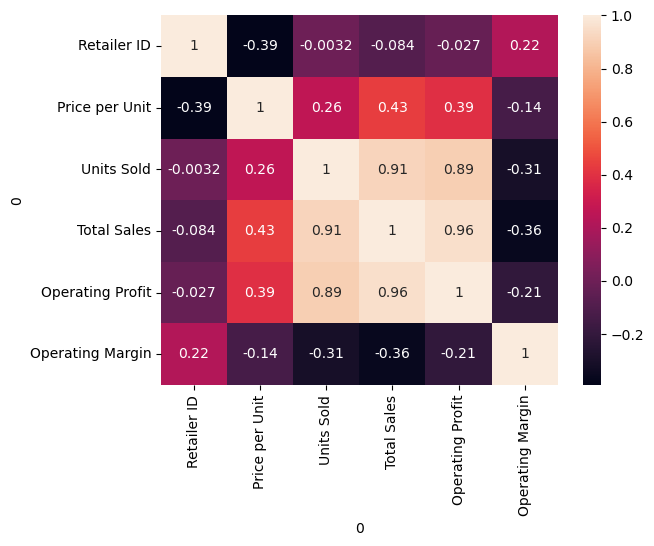

In [101]:
# correlation matrix between numerical variables
sns.heatmap(df.corr(),annot=True)

In [102]:
# divide into 2 DataFrames: year 2020 and year 2021
df = df.set_index(df['Invoice Date'])

df20 = df.loc['2020-01-01':'2020-12-31']
df21 = df.loc['2021-01-01':'2021-12-31']


In [103]:
# trend analysis
df = df.set_index(df['Invoice Date'])

# aggregating daily 'Total Sales' to Total Sales per month
monthly_sales = df['Total Sales'].resample('M').sum()  
monthly_sales = monthly_sales.rename_axis('Month').reset_index(name='Total Sales')
monthly_sales

monthly_sales.to_excel('monthly_sales.xlsx', index=False)



Based on the Line Chart Visualizations of Total Sales and Units Sold, there are a few notable observations regarding the total sales trend:

- Despite the challenges posed by the COVID-19 pandemic, the data reveals a noteworthy surge in total sales during December 2020. This increase is particularly remarkable considering the presence of lockdowns and COVID-19 restrictions in certain regions of the USA during that time. The spike in sales can primarily be attributed to the holiday season, as people traditionally engage in heightened purchasing activities for gifts and festive celebrations. This indicates that despite the prevailing circumstances, consumers found ways to adapt and participate in holiday shopping, contributing to the observed growth in total sales.

- Impact of the American Rescue Plan Act: Another notable increase in total sales is observed in March 2021. This surge can be linked to the implementation of the American Rescue Plan Act, which provided economic impact payments to eligible individuals and families. The influx of stimulus funds likely stimulated consumer spending, leading to a rise in total sales during that period.

 Overall, the data suggests that both seasonal factors, such as the holiday season, and external factors, such as government stimulus measures, can influence the total sales trend. It is important to consider these factors when analyzing sales patterns and making business decisions.

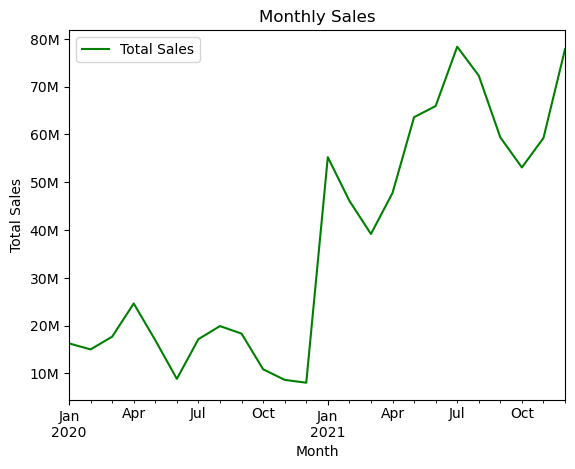

In [77]:
# Line Chart Visualization of 'Total Sales 2020-2021' to determine trends
def total_sales_formatter(x, pos):  
    # function to adjust y-axis values
    return f'{x/ 1000000:.0f}M'

monthly_sales.plot(x='Month', y='Total Sales', kind='line', color='green')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

y_formatter = FuncFormatter(total_sales_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.show()


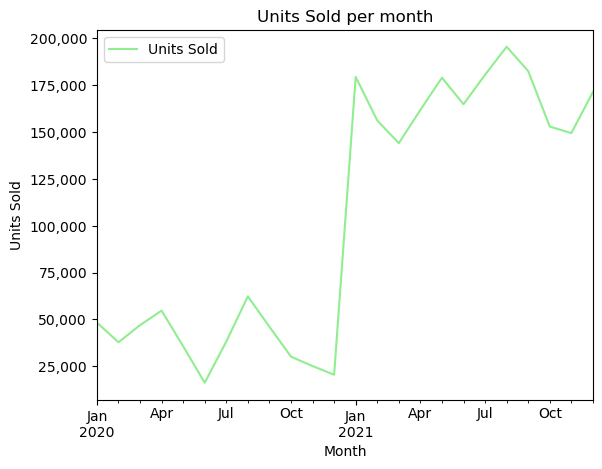

In [105]:
# Line Chart Visualization of 'Units Sold 2020-2021'

df = df.set_index(df['Invoice Date'])

# aggregating daily 'Units Sols' to Units Sold per month
monthly_sales_units = df['Units Sold'].resample('M').sum()  
monthly_sales_units = monthly_sales_units.rename_axis('Month').reset_index(name='Units Sold')

monthly_sales_units.plot(x='Month', y='Units Sold',color='lightgreen', kind='line')
plt.title('Units Sold per month')
plt.xlabel('Month')
plt.ylabel('Units Sold')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

#
Based on the Bar Chart Visualizations of Online vs Offline sales method, there are a few notable observations regarding the total sales trend:

- There was extremely low Online puchase activity during 2020. One possible factor is the ongoing COVID-19 pandemic and the associated restrictions. 

- Online purchase activity notably increased starting from January 2021.
It's possible that in some regions of the USA, lockdown measures were relaxed or lifted, allowing businesses to reopen and people to return to work. This easing of restrictions may have led to an increase in consumer confidence and online shopping activity. Additionally, government stimulus packages and economic support measures, such as the Economic Impact Payments provided by the American Rescue Plan Act of 2021, could have also played a role in boosting consumer spending.

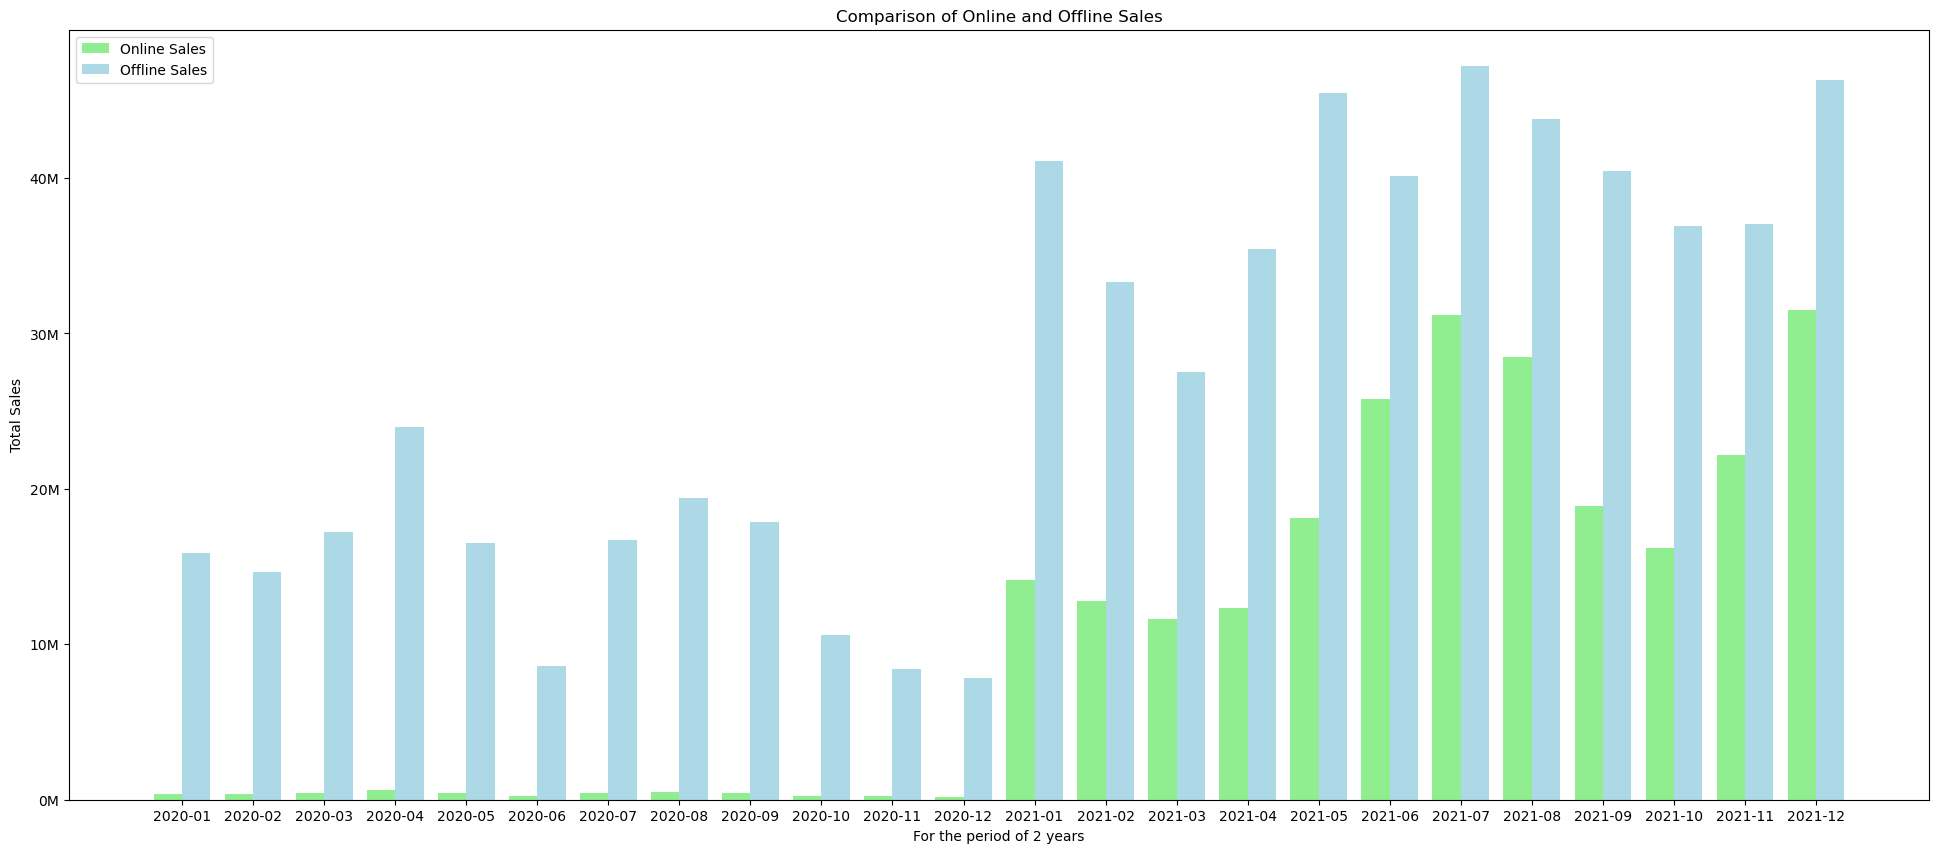

,Total Sales,Sales Method
Invoice Date,,
2020-01-01,600000,Offline
2020-01-02,500000,Offline
2020-01-03,400000,Offline
2020-01-04,382500,Offline
2020-01-05,540000,Offline
...,...,...
2021-01-24,3200,Offline
2021-01-24,4305,Offline
2021-02-22,7544,Offline


In [125]:
# Bar Chart Visualization based on 'Online/Offline Sales'
sales_method_df = df[['Invoice Date', 'Total Sales', 'Sales Method']].copy() 

# online sales table
sales_method_df.set_index('Invoice Date', inplace=True)
online_sales = sales_method_df[sales_method_df['Sales Method'] == 'Online']
monthly_total_sales = online_sales['Total Sales'].resample('M').sum()
online_sales_df = pd.DataFrame({'Total Sales (Online)': monthly_total_sales})


# offline sales table
offline_sales = sales_method_df[sales_method_df['Sales Method'] != 'Online']
monthly_total_sales = offline_sales['Total Sales'].resample('M').sum()
offline_sales_df = pd.DataFrame({'Total Sales (Offline)': monthly_total_sales})


# plot 'Totals of Online and Offline' Sales Method
def total_sales_formatter(x, pos):  
    # function to adjust y-axis values
    return f'{x/ 1000000:.0f}M'

x_labels = online_sales_df.index.to_period('M').astype(str).tolist()
bar_width = 0.4

plt.figure(figsize=(24, 10))
plt.bar(x_labels, online_sales_df['Total Sales (Online)'], color='lightgreen', label='Online Sales', width=bar_width)
plt.bar([x + bar_width for x in range(len(x_labels))], offline_sales_df['Total Sales (Offline)'], color='lightblue', label='Offline Sales', width=bar_width)
plt.xlabel('For the period of 2 years')
plt.ylabel('Total Sales')
plt.title('Comparison of Online and Offline Sales')
plt.legend()

plt.xticks([x + bar_width/2 for x in range(len(x_labels))], x_labels)

# formatting y-axis tick variables
y_formatter = FuncFormatter(total_sales_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.show()

# replace 'In-Store' and 'Outlet' with 'Offline'
sales_method_df['Sales Method'] = sales_method_df['Sales Method'].replace(['In-store', 'Outlet'], 'Offline')


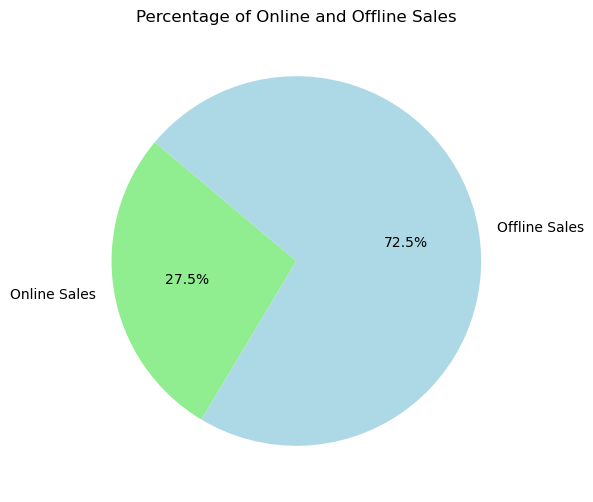

In [109]:
# pecentage of 'Online' and 'Offline' sales from 'Total Sales'

total_online = online_sales['Total Sales'].sum()
total_offline = offline_sales['Total Sales'].sum()
total_sales = df['Total Sales'].sum()

# caclulation percentage
perc_online = (total_online/total_sales)*100
perc_offline = (total_offline/total_sales)*100

# plot 'Percentage of Online and Offline Sales'
labels = ['Online Sales', 'Offline Sales']

sizes = [perc_online,perc_offline]
colors = ['lightgreen', 'lightblue']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Percentage of Online and Offline Sales')

plt.show()


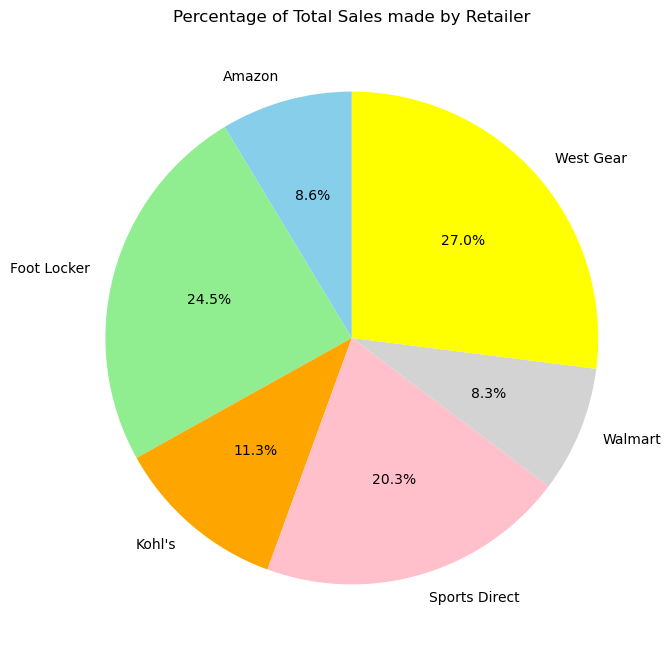

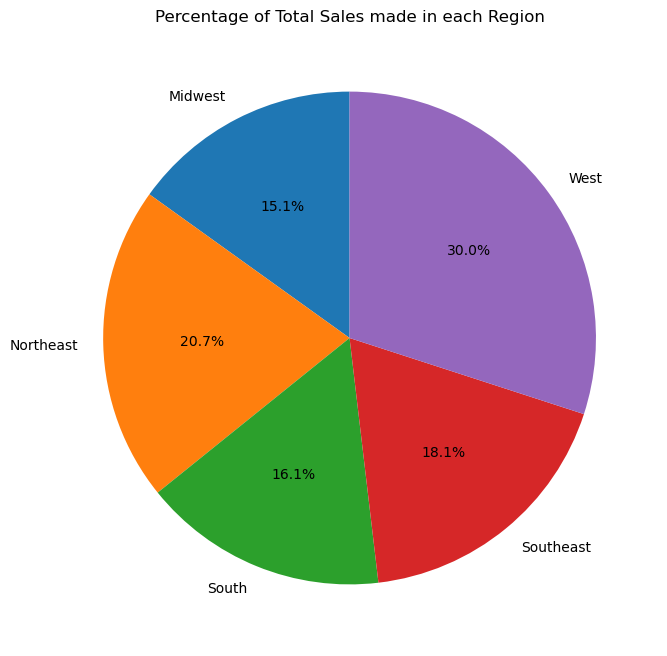

In [110]:
# percentage from 'Total Sales' made by each 'Retailer'
group_by_retailer = df.groupby('Retailer')['Total Sales'].sum()
group_by_retailer_df = group_by_retailer.reset_index(name='Total Sales')

# plot 
labels = group_by_retailer.index
sizes = group_by_retailer.values

colors =['skyblue', 'lightgreen', 'orange', 'pink','lightgrey', 'yellow']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Total Sales made by Retailer')

plt.show()

# percentage from 'Total Sales' made in each 'Region'
group_by_region = df.groupby('Region')['Total Sales'].sum()

# plot
labels = group_by_region.index
sizes = group_by_region.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Sales made in each Region')

plt.show()


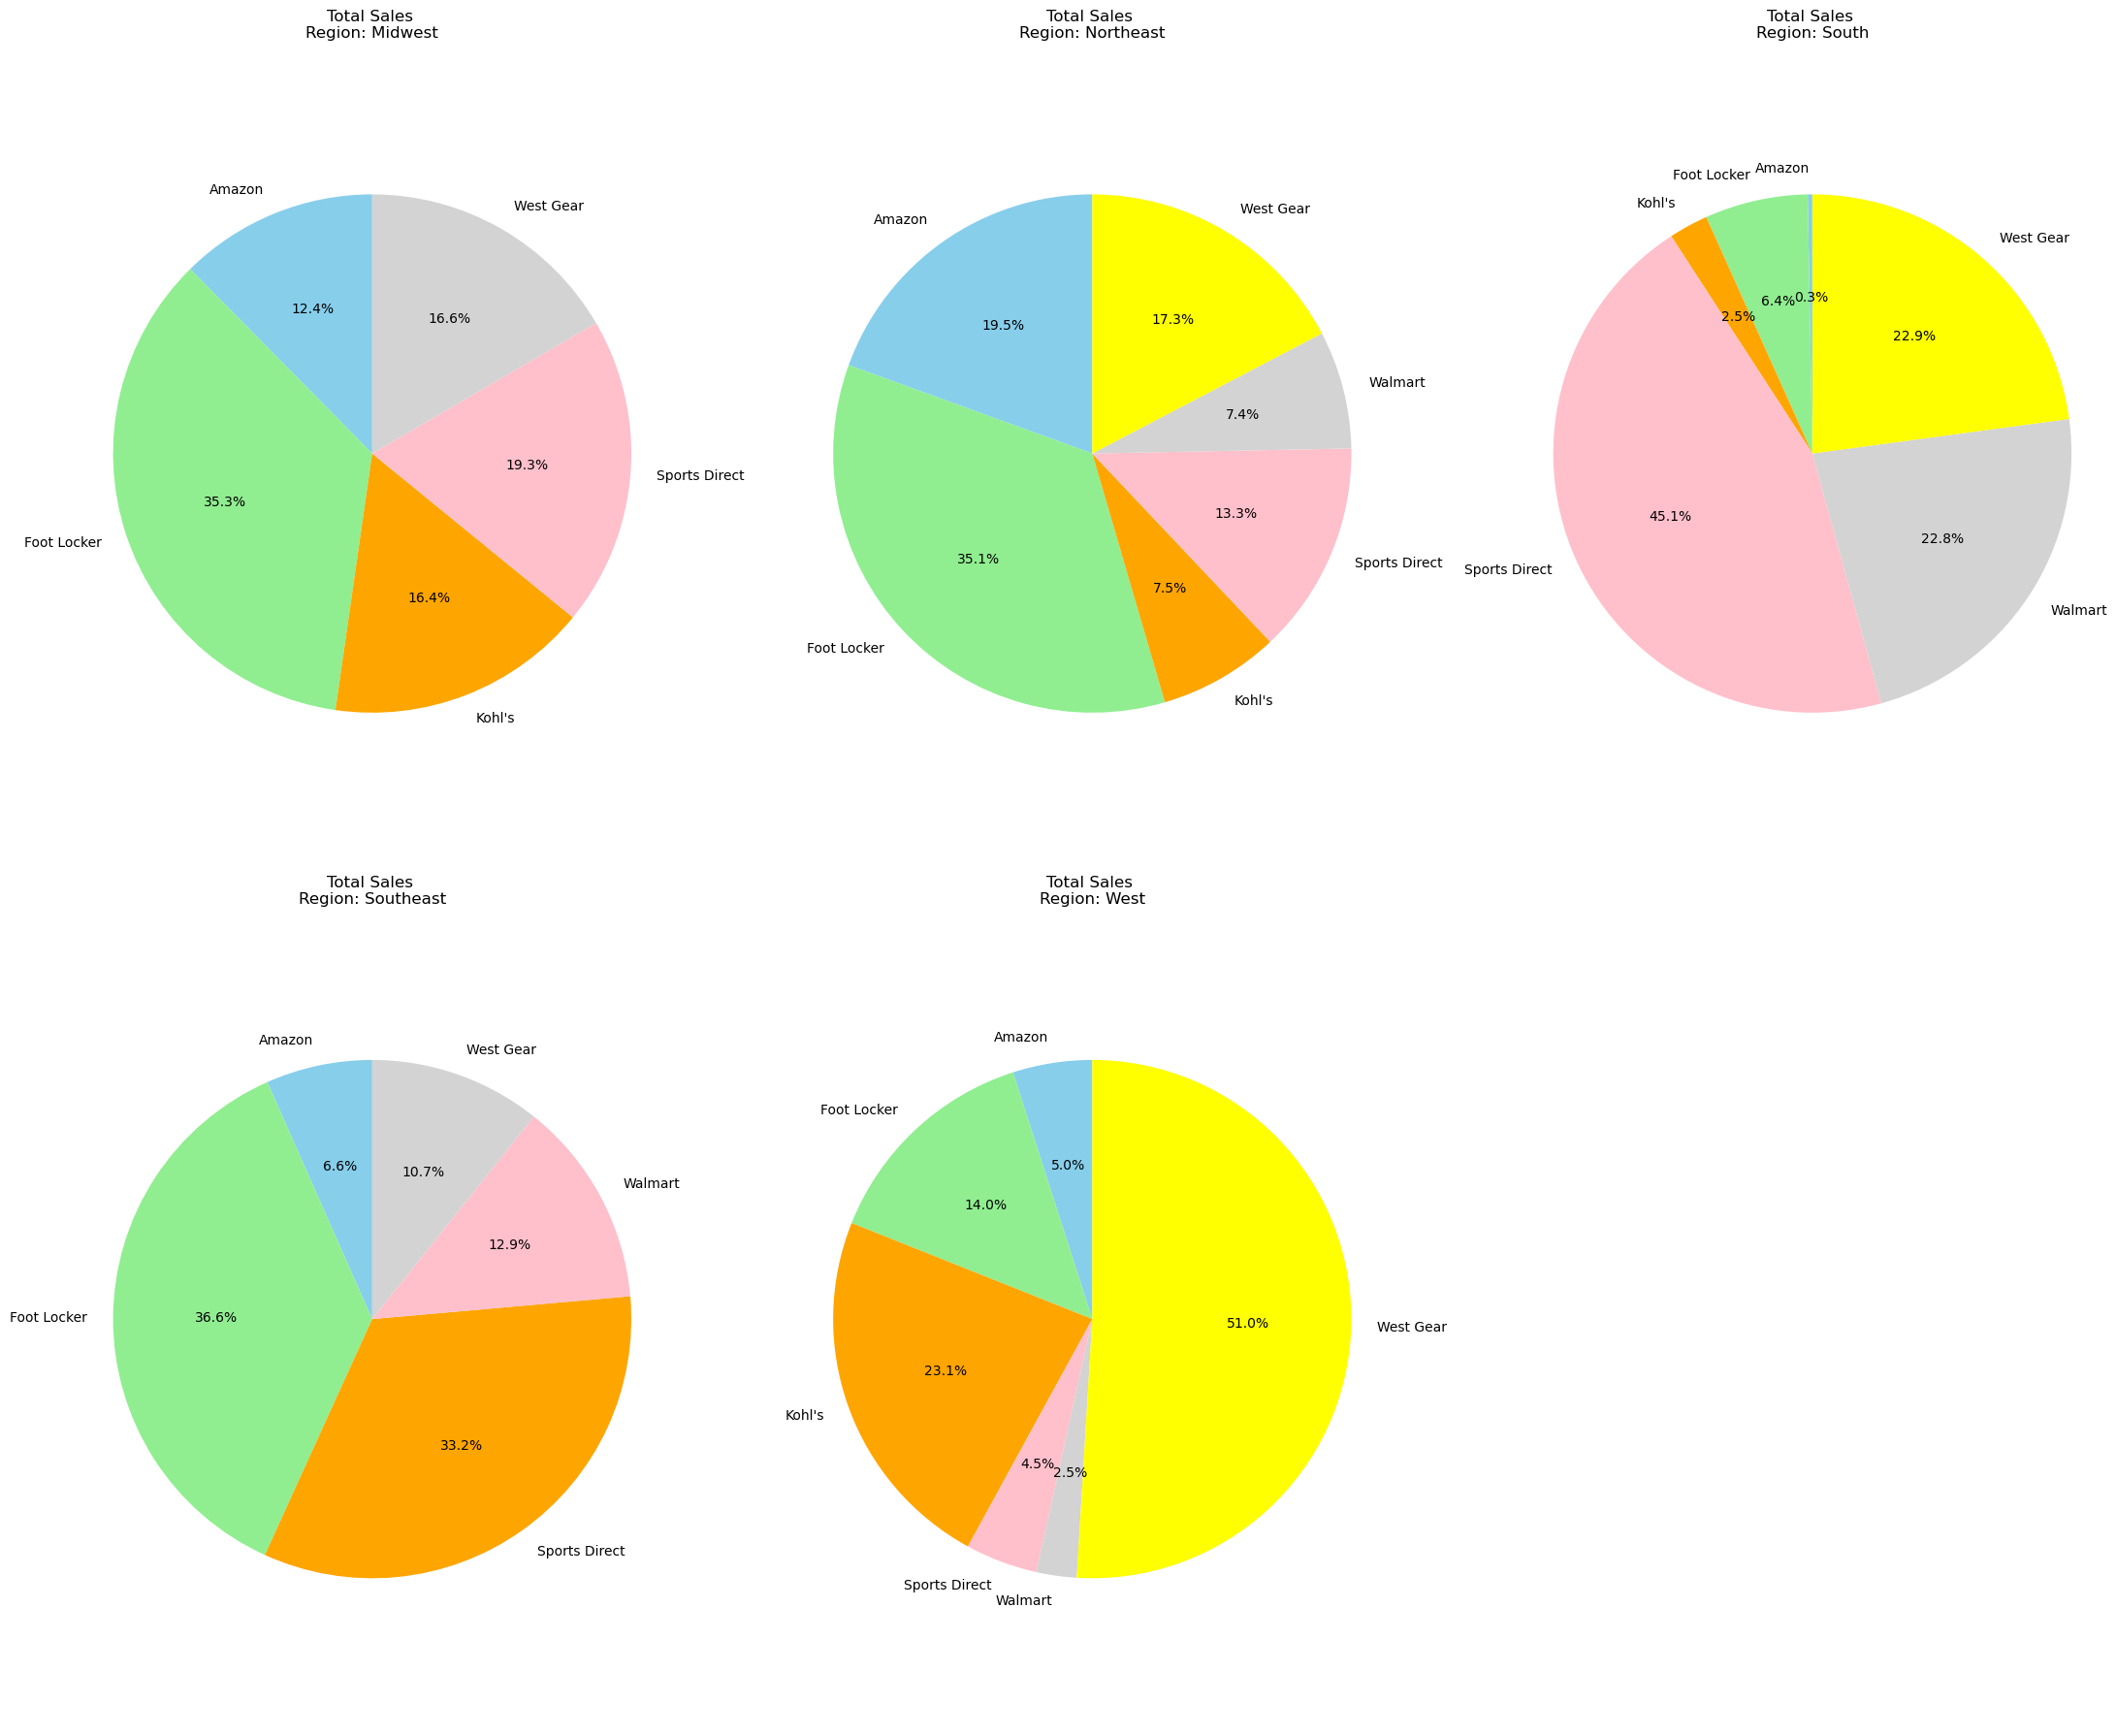

Region     Retailer     
Midwest    Amazon            16835867
           Foot Locker       47987345
           Kohl's            22229404
           Sports Direct     26207173
           West Gear         22540555
Northeast  Amazon            36262576
           Foot Locker       65326435
           Kohl's            14031152
           Sports Direct     24698062
           Walmart           13712005
           West Gear         32293721
South      Amazon              409091
           Foot Locker        9307020
           Kohl's             3552055
           Sports Direct     65258104
           Walmart           33049852
           West Gear         33087024
Southeast  Amazon            10826328
           Foot Locker       59669108
           Sports Direct     54178536
           Walmart           21005536
           West Gear         17491703
West       Amazon            13365022
           Foot Locker       37804698
           Kohl's            62302113
           Sports Direct 

In [122]:
# Percentage of 'Total Sales of Region' of each 'Retailer' 
group_by_retailer = df.groupby('Retailer')['Total Sales'].sum()


retailer_labels = group_by_retailer.index
retailer_sizes = group_by_retailer.values
retailer_colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'lightgrey', 'yellow']

# 'Total Sales' by Region
group_by_region = df.groupby(['Region', 'Retailer'])['Total Sales'].sum()
group_by_region.to_excel('group_by_region_pie.xlsx', index=False)

region_labels = group_by_region.index.get_level_values('Region').unique()

plt.figure(figsize=(22,18))

# subplots for each region
num_subplots = len(region_labels)
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols

for i, region in enumerate(region_labels, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    # filter data for the current region
    region_data = group_by_region.loc[region]
    sizes = region_data.values
    labels = region_data.index.get_level_values('Retailer')
    
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=retailer_colors)
    plt.title(f'Total Sales \nRegion: {region}')
    plt.axis('equal')  # ensure a circular pie chart
    
plt.tight_layout()
plt.show()
group_by_region


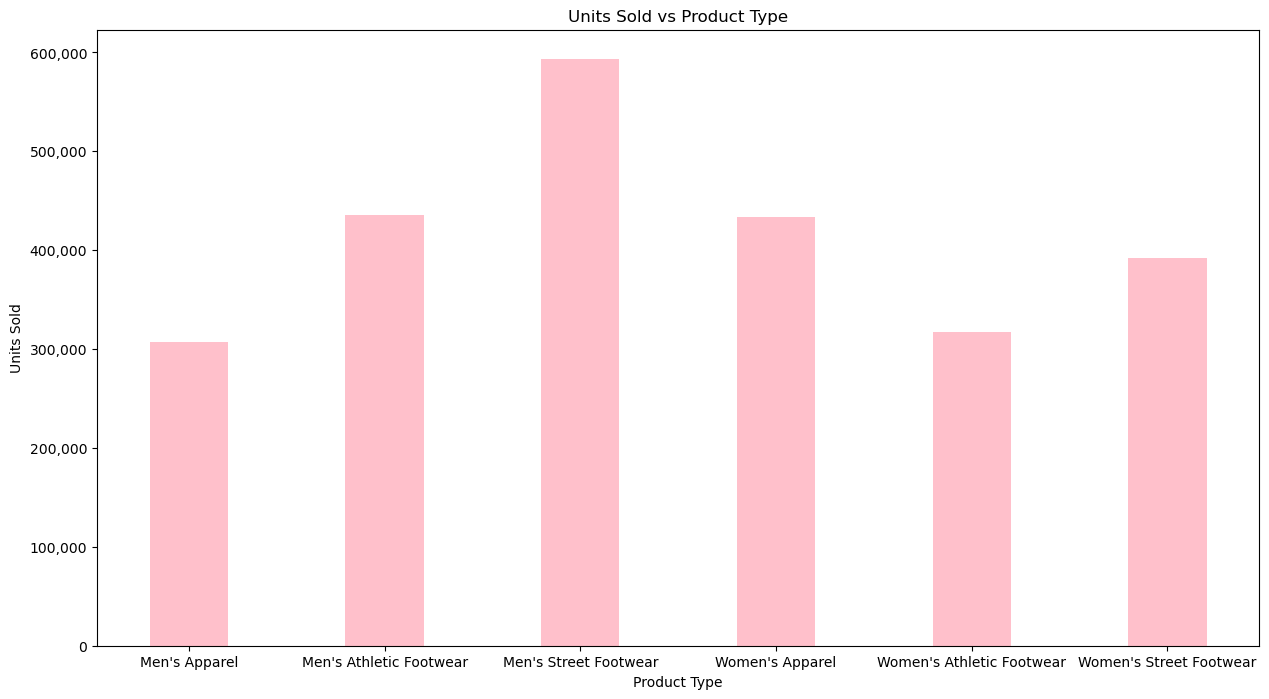

In [120]:
# 'Product Type' of 'Units Sold'
grouped_data_by_product_type = df.groupby('Product')['Units Sold'].sum()
product_sales_df = grouped_data_by_product_type.reset_index(name='Units Sold')

x = grouped_data_by_product_type.index
y = grouped_data_by_product_type.values

bar_width = 0.4
plt.figure(figsize=(15, 8))
plt.bar(x, y, color='pink',width=bar_width)
plt.title('Units Sold vs Product Type')
plt.xlabel('Product Type')
plt.ylabel('Units Sold')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()


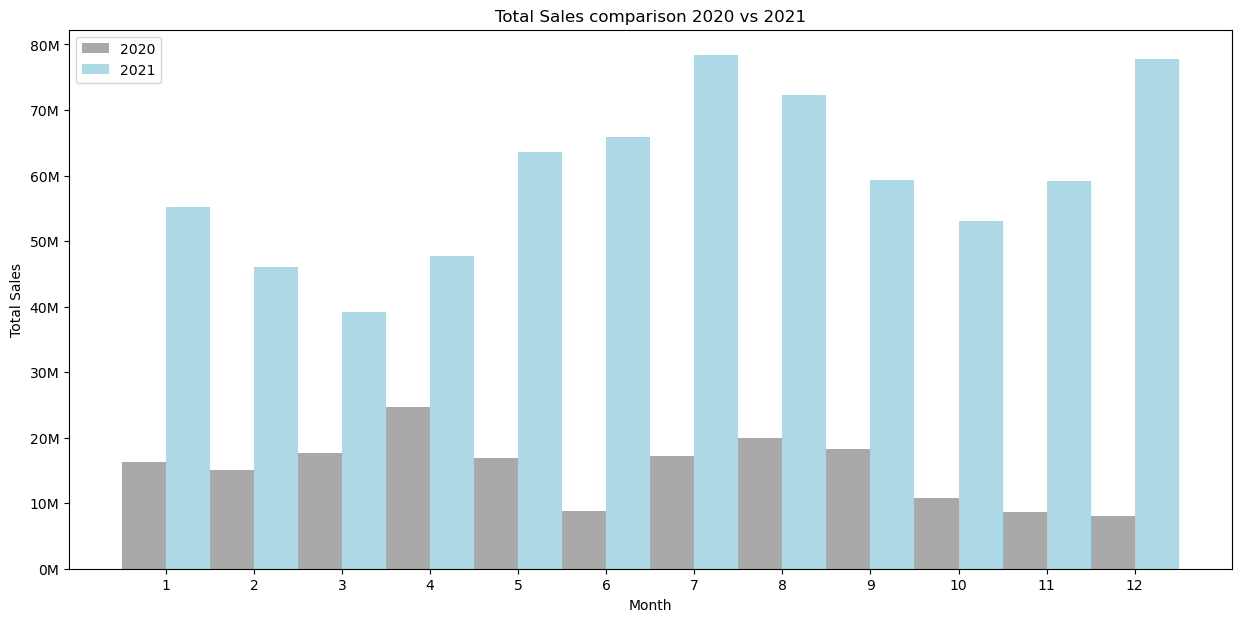

In [116]:
# comparison of 2020 and 2021 'Total Sales'

df = df.set_index(df['Invoice Date'])
df20 = df.loc['2020-01-01':'2020-12-31']

df21 = df.loc['2021-01-01':'2021-12-31']

# 2020
groupby_month20 = df20.groupby(df20['Invoice Date'].dt.month)
monthly_sales20 = groupby_month20['Total Sales'].sum()
monthly_sales20 = monthly_sales20.rename_axis('Month').reset_index(name='Total Sales')

# 2021
groupby_month21 = df21.groupby(df21['Invoice Date'].dt.month)
monthly_sales21 = groupby_month21['Total Sales'].sum()
monthly_sales21 = monthly_sales21.rename_axis('Month').reset_index(name='Total Sales')

# plot Totals of 2020 and 2021 'Total Sales' 

def total_sales_formatter(x, pos):  # function to adjust y-axis values
    return f'{x/ 1000000:.0f}M'

bar_width = 0.5
x_labels = np.arange(len(monthly_sales20['Month']))

plt.figure(figsize=(15,7))
plt.bar(x_labels + 1, monthly_sales20['Total Sales'], width=bar_width, label='2020', color='darkgrey')
plt.bar(x_labels + 1 + bar_width, monthly_sales21['Total Sales'], width=bar_width, label='2021', color='lightblue')

plt.title('Total Sales comparison 2020 vs 2021')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.xticks([x + 1 + bar_width/2 for x in range(len(x_labels))], x_labels + 1)

y_formatter = FuncFormatter(total_sales_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.legend()
plt.show()

#
The descending growth rate from January to April could be attributed to several factors affecting the sales performance during this period. Here are some possible explanations for the observed trend:

- Sales in January might have been boosted by the holiday season, including Christmas and New Year's sales. As the holiday period ends, sales may return to normal levels or even decrease in the following months.

- COVID-19 pandemic, the growth rate might have been influenced by various lockdowns, restrictions, or changing consumer behavior.

The growth rate increasing from April to June could be influenced by various factors that positively impact sales during this period. Here are some potential explanations for the observed trend:

- The period from April to June includes holidays and special occasions, such as Easter, Mother's Day, Father's Day, and graduations. These events can drive increased consumer spending and boost sales for relevant products or services.

- In some regions, the weather tends to improve during spring, leading to increased outdoor activities, travel, and overall consumer spending.

- If the business or the economy was negatively impacted earlier in the year, the months from April to June could represent a period of economic recovery, leading to increased consumer confidence and spending. Vaccination efforts started toward the end of 2020, and vaccination campaigns continued in subsequent years to control the pandemic's impact

- After a period of reduced activity, customers may have accumulated pent-up demand, leading to a surge in sales when conditions improve.


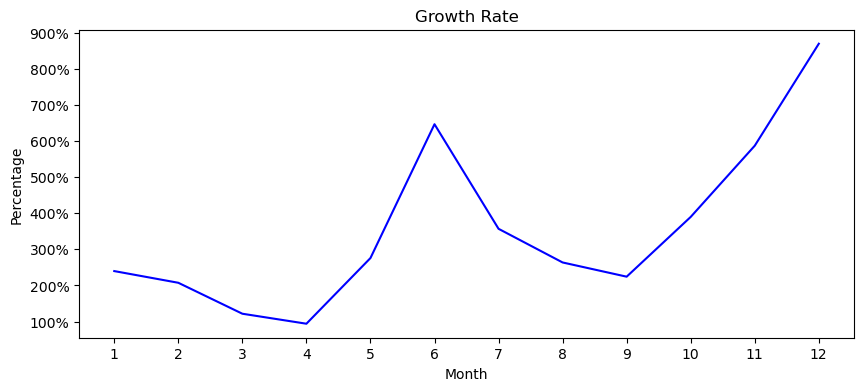

In [134]:
# calculating 'Growth Rate'

growth_rate = ((monthly_sales21['Total Sales'] - monthly_sales20['Total Sales']) / monthly_sales20['Total Sales'])*100
monthly_sales21['Growth Rate'] = growth_rate

# function to adjust y-axis values
def total_sales_formatter(x, pos): 
    return f'{x/ 1:.0f}%'

plt.figure(figsize=(10,4))
plt.plot(monthly_sales21['Month'], monthly_sales21['Growth Rate'], color='blue')

plt.title('Growth Rate')
plt.xlabel('Month')
plt.ylabel('Percentage')

plt.xticks(monthly_sales21['Month'])

y_formatter = FuncFormatter(total_sales_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.show()


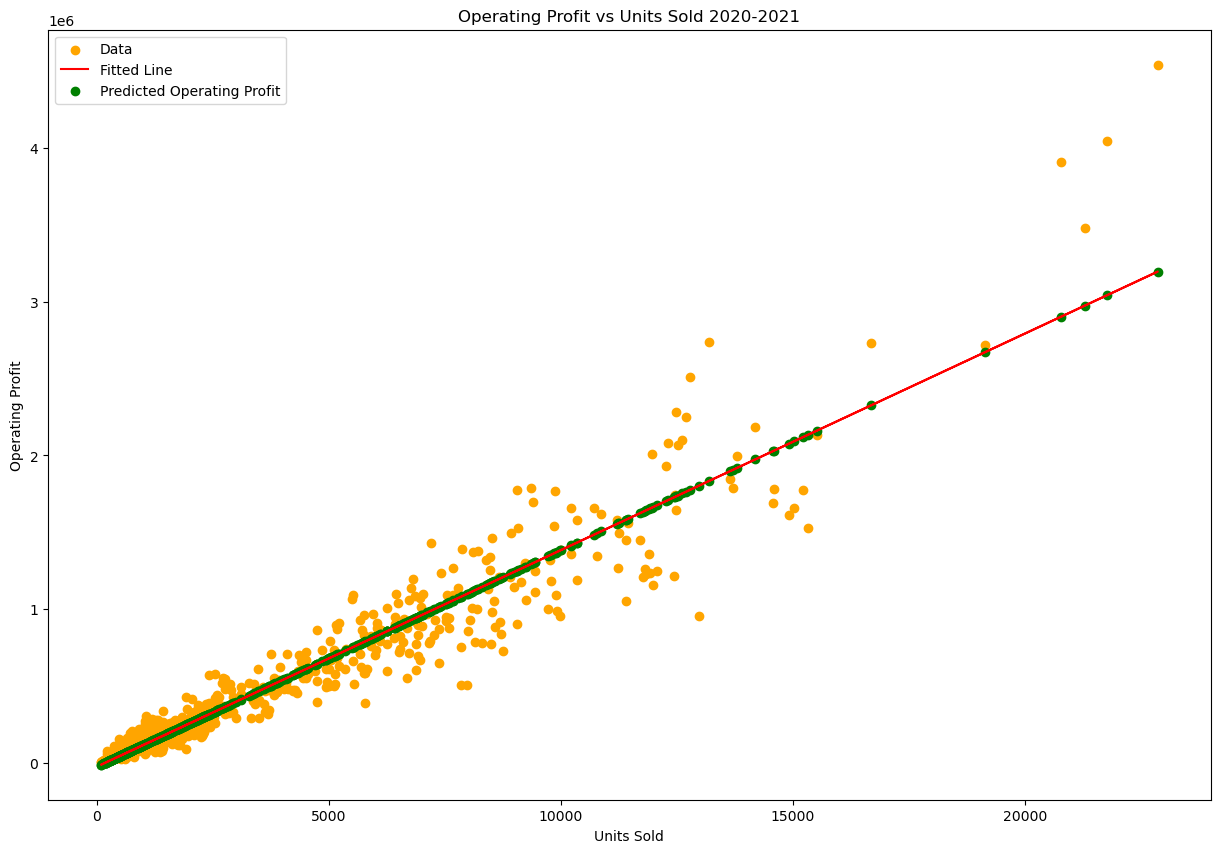

Invoice Date
2020-01-01    382130
2020-01-02    225945
2020-01-03    202277
2020-01-04    228233
2020-01-05    222390
               ...  
2021-12-27    282957
2021-12-28    106357
2021-12-29     85278
2021-12-30     62109
2021-12-31     63120
Name: Operating Profit, Length: 724, dtype: int64

In [98]:
# Simple Linear Regression
df.reset_index(drop=True, inplace=True)

total_sales_2_years_monthly = df.groupby('Invoice Date')['Total Sales'].sum()
operating_profit_2 = df.groupby('Invoice Date')['Operating Profit'].sum()

x = units_sold_2_years_monthly
y = operating_profit_2

# create regression model
model = LinearRegression()

# reshape time series to 2d array
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

model.fit(x,y)
intercept = model.intercept_[0]
slope = model.coef_[0][0]

# predict 'Operating Profit' based on 'Units Sold' using the trained model
predicted_operating_profit = model.predict(x)

# Plot the data and the fitted line
plt.figure(figsize=(15, 10))
plt.scatter(x, y, color='orange', label='Data')
plt.plot(x, predicted_operating_profit, color='red', label='Fitted Line')
plt.scatter(x, predicted_operating_profit, color='green', label='Predicted Operating Profit')
plt.title('Operating Profit vs Units Sold 2020-2021')
plt.xlabel('Units Sold')
plt.ylabel('Operating Profit')
plt.legend()

plt.show()

In [136]:
# each State 'Total Sales' csv file for Tableau
state_total_sales = df.groupby('State')['Total Sales'].sum()
state_total_sales_df = state_total_sales.reset_index(name='Total Sales')
state_total_sales_df.to_excel('state_total_sales.xlsx', index=False)

# 'Units Sold' in each state
state_total_units_sold = df.groupby('State')['Units Sold'].sum()
state_total_units_sold_df = state_total_units_sold.reset_index(name='Total Sales')
state_total_units_sold_df.to_excel('state_total_units_sold_df.xlsx', index=False)

state_sales_units_df = state_total_sales_df.merge(state_total_units_sold_df, on='State')
state_sales_units_df.to_excel('state_sales_units.xlsx', index=False)

# xlsx for Tableau
sales_method_df.to_excel('sales_method_df.xlsx', index=False)
monthly_sales_units.to_excel('monthly_sales_units.xlsx', index=False)
sales_method_df.to_excel('onlineOffline.xlsx', index=False)
group_by_retailer_df.to_excel('group_by_retailer_df_general.xlsx', index=False)
product_sales_df.to_excel('product_sales.xlsx', index=False)
monthly_sales20.to_excel('monthly_sales20_comparison.xlsx', index=False)
monthly_sales21.to_excel('monthly_sales21_comparison.xlsx', index=False)

In [667]:
df['Total Sales'].sum()

899901793